In [183]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [184]:
df = pd.read_csv(r"H:\adult_dataset-1 - adult_dataset-1.csv")
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,"£4,356.00",40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,"£4,356.00",18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,"£4,356.00",40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,"£3,900.00",40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,"£3,900.00",40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,£0.00,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,£0.00,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,£0.00,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,£0.00,40,United-States,<=50K


# 1.a. Find the null values in different columns


In [185]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      1
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

# 1.b. Check the data types of each columns


In [186]:
df.dtypes

age                int64
workclass         object
fnlwgt            object
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss      object
hours.per.week     int64
native.country    object
income            object
dtype: object

# 1.c. Drop “?” rows from all columns


In [187]:
df.drop(df[(df['workclass'] == '?')].index,inplace=True)
df.drop(df[(df['occupation'] == '?')].index,inplace=True)
df.drop(df[(df['native.country'] == '?')].index,inplace=True)

In [188]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,"£4,356.00",18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,"£3,900.00",40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,"£3,900.00",40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,"£3,770.00",45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,"£3,770.00",40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,£0.00,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,£0.00,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,£0.00,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,£0.00,40,United-States,<=50K


# 1.d. Change income column to binary class numerical value.


In [189]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [190]:
df['income'] = le.fit_transform(df['income'])

In [191]:
df['income'].value_counts()

0    22654
1     7508
Name: income, dtype: int64

In [192]:
df.dtypes

age                int64
workclass         object
fnlwgt            object
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss      object
hours.per.week     int64
native.country    object
income             int32
dtype: object

# 1.e. Find the different unique values in each categorical column


In [193]:
for i in df.columns:
    print(i,df[i].unique(),"\n")

age [82 54 41 34 38 74 68 45 52 32 46 57 37 29 61 51 21 33 49 23 59 60 63 53
 44 43 48 71 73 40 50 42 39 55 47 31 58 62 36 67 72 78 83 26 70 27 35 81
 66 65 25 28 56 69 20 30 90 24 64 75 19 77 22 80 18 17 79 76 88 84 85 86] 

workclass ['Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay'] 

fnlwgt ['132870' '140359' '264663' ... '84661' '257302' '201490'] 

education ['HS-grad' '7th-8th' 'Some-college' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-voc' '1st-4th' '5th-6th' 'Assoc-acdm'
 '12th' '9th' 'Preschool'] 

education.num [ 9  4 10  6 16 15 13 14  7 11  2  3 12  8  5  1] 

marital.status ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse'] 

occupation ['Exec-managerial' 'Machine-op-inspct' 'Prof-specialty' 'Other-service'
 'Adm-clerical' 'Transport-moving' 'Sales' 'Craft-repair'
 'Farming-fishing' 'Tech-support' 'Protective-serv' 'Handlers-cleaners'

# 2.a. Handle the missing values and noise values


In [194]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [195]:
df['capital.loss'] = df['capital.loss'].str.replace('£', '', regex=True)
df['capital.loss'] = df['capital.loss'].str.replace(',', '', regex=True)

In [196]:
df.drop(df[(df['capital.loss'] == 'Pqrt')].index,inplace=True)

In [197]:
df['capital.loss'] = pd.to_numeric(df['capital.loss'], errors='coerce')

In [198]:
df['capital.loss'].value_counts()

0.0       28735
1902.0      194
1977.0      162
1887.0      155
1848.0       50
          ...  
2201.0        1
1944.0        1
1411.0        1
3004.0        1
4356.0        1
Name: capital.loss, Length: 90, dtype: int64

In [199]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356.0,18,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900.0,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900.0,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770.0,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770.0,40,United-States,0


In [200]:
df['fnlwgt'] =pd.to_numeric(df['fnlwgt'],errors = 'coerce')

In [201]:
df.corr()

C:\Users\shreyash\AppData\Local\Temp\ipykernel_8004\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
age,1.000000,-0.076543,0.043525,0.080150,0.060394,0.101598,0.241981
fnlwgt,-0.076543,1.000000,-0.044996,0.000417,-0.009619,-0.022885,-0.008975
education.num,0.043525,-0.044996,1.000000,0.124416,0.079683,0.152522,0.335287
capital.gain,0.080150,0.000417,0.124416,1.000000,-0.032218,0.080431,0.221195
capital.loss,0.060394,-0.009619,0.079683,-0.032218,1.000000,0.052448,0.150197
hours.per.week,0.101598,-0.022885,0.152522,0.080431,0.052448,1.000000,0.229480
income,0.241981,-0.008975,0.335287,0.221195,0.150197,0.229480,1.000000


# 2.b. Treat the outlier


In [202]:
col1 = ['age','fnlwgt','education.num','hours.per.week']

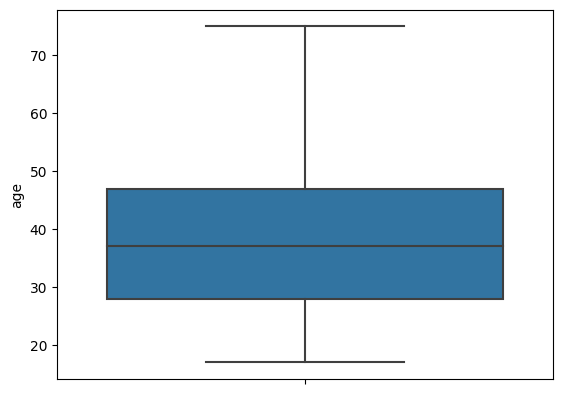

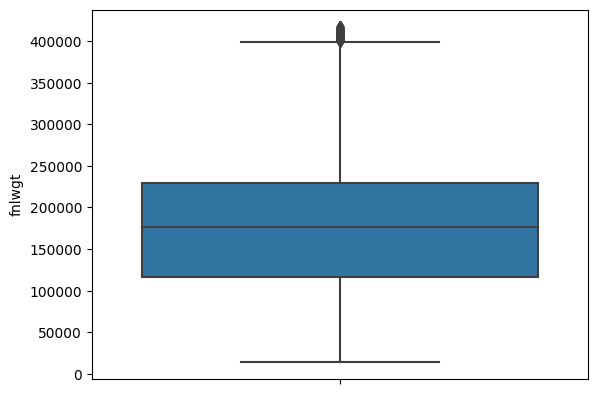

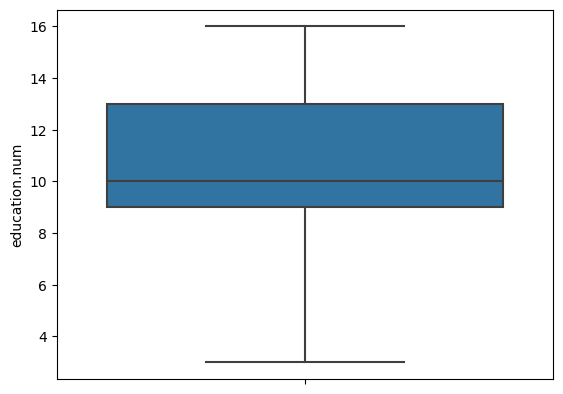

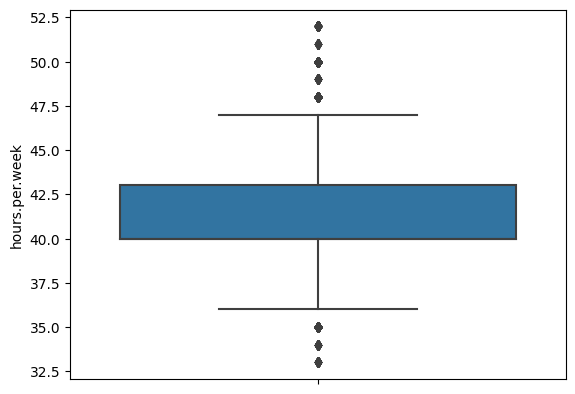

In [203]:
for c in col1:
  percentile25 = df[c].quantile(0.25)
  percentile75 = df[c].quantile(0.75)
  IQR = percentile75 - percentile25
  Upperlimit = percentile75 + 1.5*IQR
  Lowerlimit = percentile25 - 1.5*IQR
  df= df[df[c]<=Upperlimit]
  df = df[df[c]>=Lowerlimit]
  plt.figure()
  sns.boxplot(y=c, data =df)

# 2c. Apply the scaling on numerical columns


In [204]:
col2 = ['age','education.num','capital.gain','capital.loss','hours.per.week']

In [205]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df[col2] = sc.fit_transform(df[col2])

In [206]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
3,1.283314,Private,140359.0,7th-8th,-2.554823,Divorced,Machine-op-inspct,Unmarried,White,Female,-0.149458,9.407870,-0.403106,United-States,0
4,0.186422,Private,264663.0,Some-college,-0.083471,Separated,Prof-specialty,Own-child,White,Female,-0.149458,9.407870,-0.403106,United-States,0
5,-0.404213,Private,216864.0,HS-grad,-0.495363,Divorced,Other-service,Unmarried,White,Female,-0.149458,9.086908,0.834377,United-States,0
6,-0.066707,Private,150601.0,10th,-1.731039,Separated,Adm-clerical,Unmarried,White,Male,-0.149458,9.086908,-0.403106,United-States,0
10,0.523927,Private,172274.0,Doctorate,2.387880,Divorced,Prof-specialty,Unmarried,Black,Female,-0.149458,7.195701,-1.640588,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,1.198938,Private,321865.0,Masters,1.564096,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.149458,-0.220989,-0.403106,United-States,1
32556,-1.416729,Private,310152.0,Some-college,-0.083471,Never-married,Protective-serv,Not-in-family,White,Male,-0.149458,-0.220989,-0.403106,United-States,0
32557,-0.994847,Private,257302.0,Assoc-acdm,0.740312,Married-civ-spouse,Tech-support,Wife,White,Female,-0.149458,-0.220989,-0.898099,United-States,0
32558,0.102045,Private,154374.0,HS-grad,-0.495363,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,-0.149458,-0.220989,-0.403106,United-States,1


# 2.d. Apply the encoding on categorical columns

In [207]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [208]:
df.dtypes

age               float64
workclass          object
fnlwgt            float64
education          object
education.num     float64
marital.status     object
occupation         object
relationship       object
race               object
sex                object
capital.gain      float64
capital.loss      float64
hours.per.week    float64
native.country     object
income              int32
dtype: object

In [209]:
col3 = ['workclass','education','marital.status','occupation','relationship','race','sex','native.country']

In [210]:
for c in col3:
  df[c] = le.fit_transform(df[c])

In [211]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
3,1.283314,2,140359.0,4,-2.554823,0,6,4,4,0,-0.149458,9.407870,-0.403106,38,0
4,0.186422,2,264663.0,13,-0.083471,5,9,3,4,0,-0.149458,9.407870,-0.403106,38,0
5,-0.404213,2,216864.0,10,-0.495363,0,7,4,4,0,-0.149458,9.086908,0.834377,38,0
6,-0.066707,2,150601.0,0,-1.731039,5,0,4,4,1,-0.149458,9.086908,-0.403106,38,0
10,0.523927,2,172274.0,9,2.387880,0,9,4,2,0,-0.149458,7.195701,-1.640588,38,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,1.198938,2,321865.0,11,1.564096,2,3,0,4,1,-0.149458,-0.220989,-0.403106,38,1
32556,-1.416729,2,310152.0,13,-0.083471,4,10,1,4,1,-0.149458,-0.220989,-0.403106,38,0
32557,-0.994847,2,257302.0,6,0.740312,2,12,5,4,0,-0.149458,-0.220989,-0.898099,38,0
32558,0.102045,2,154374.0,10,-0.495363,2,6,0,4,1,-0.149458,-0.220989,-0.403106,38,1


# 3.a. Split the data for training and testing


In [212]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [213]:
x = df[['age', 'workclass','education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country']].values
x

array([[ 1.28331418,  2.        ,  4.        , ...,  9.40787006,
        -0.40310581, 38.        ],
       [ 0.18642161,  2.        , 13.        , ...,  9.40787006,
        -0.40310581, 38.        ],
       [-0.40421285,  2.        , 10.        , ...,  9.08690809,
         0.83437656, 38.        ],
       ...,
       [-0.99484731,  2.        ,  6.        , ..., -0.22098913,
        -0.89809875, 38.        ],
       [ 0.10204526,  2.        , 10.        , ..., -0.22098913,
        -0.40310581, 38.        ],
       [ 1.62081958,  2.        , 10.        , ..., -0.22098913,
        -0.40310581, 38.        ]])

In [214]:
y = df['income'].values
y

array([0, 0, 0, ..., 0, 1, 0])

In [215]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.2, random_state =43)

In [216]:
x_train

array([[ 0.43955066,  2.        ,  8.        , ..., -0.22098913,
        -0.40310581, 38.        ],
       [ 0.10204526,  4.        ,  8.        , ..., -0.22098913,
         2.07185893, 38.        ],
       [-0.4885892 ,  2.        , 10.        , ..., -0.22098913,
        -0.40310581, 38.        ],
       ...,
       [-1.58548177,  2.        , 13.        , ..., -0.22098913,
        -0.40310581, 38.        ],
       [ 0.35517431,  5.        , 13.        , ..., -0.22098913,
        -0.40310581, 38.        ],
       [ 0.35517431,  2.        , 13.        , ..., -0.22098913,
        -0.40310581, 38.        ]])

# 3 b. Train the logistic regression model, determine the training accuracy


In [217]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [218]:
classifier.fit(x_train,y_train)

C:\Users\shreyash\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [219]:
y_pred=classifier.predict(x_test)


In [220]:
y_pred1=classifier.predict(x_train)

## Testing accuracy

In [221]:

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8035630567276137

## Training accuracy


In [222]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred1)

0.8155442236680148

## confusion_matrix


In [223]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[2916,  196],
       [ 642,  512]], dtype=int64)

# 3.c. Train the Decision tree model and determine the training accuracy and


In [224]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()

In [225]:
dc.fit(x_train,y_train)

DecisionTreeClassifier()

In [226]:
y_pred = dc.predict(x_test)

In [227]:
y_pred1 = dc.predict(x_train)


## Training accuracy

In [228]:
accuracy_score(y_train, y_pred1)

0.9721587245765195

## Testing accuracy

In [229]:
accuracy_score(y_test, y_pred)

0.7890295358649789

## confusion_matrix


In [230]:
confusion_matrix(y_test,y_pred)

array([[2689,  423],
       [ 477,  677]], dtype=int64)

# Q4. Change the threshold probability of the logistic regression model to 60% and print
## the confusion matrix.

In [231]:
y_pred = (classifier.predict_proba(x_test)[:,1]>0.6).astype(int)

In [232]:
confusion_matrix(y_test,y_pred)

array([[2993,  119],
       [ 736,  418]], dtype=int64)